# Урок 9. Линейная регрессия Логистическая регрессия

Импорт необходимых библиотек:

In [224]:
import numpy as np
import matplotlib.pyplot as plt

## Задача №1

_Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
**zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].**
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за **X** заработную плату (то есть, zp - признак),
а за **y** - значения скорингового балла (то есть, ks - целевая переменная).
Произвести расчет как с использованием intercept, так и без._

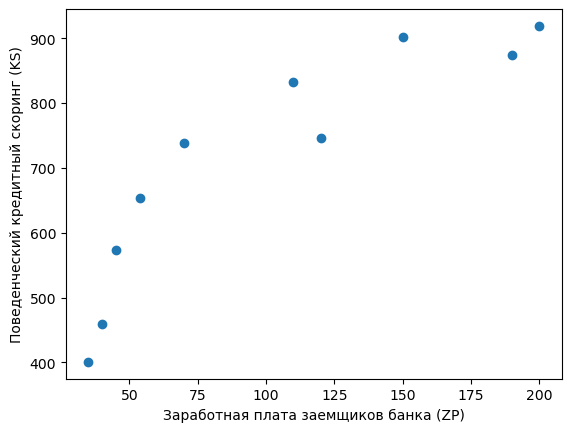

In [225]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter(zp, ks)
plt.xlabel('Заработная плата заемщиков банка (ZP)')
plt.ylabel('Поведенческий кредитный скоринг (KS)', rotation=90)
plt.show()

На основании графика, делаем предположение о наличии линейной взаимосвязи.

### Определим с intercept


In [226]:
b1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp ** 2) - np.mean(zp) ** 2)
print(f'b1 = {b1:.2f}')

b1 = 2.62


In [227]:
b0 = np.mean(ks) - b1 * np.mean(zp)
print(f'b0 = {b0:.2f}')

b0 = 444.18


In [228]:
y_pred = b0 + b1 * zp
print(f'y_pred = {y_pred}')

y_pred = [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


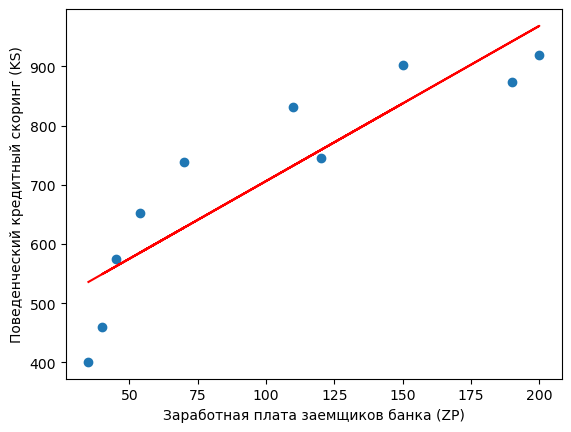

In [229]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred, 'r')
plt.xlabel('Заработная плата заемщиков банка (ZP)')
plt.ylabel('Поведенческий кредитный скоринг (KS)', rotation=90)
plt.show()

Расчет наглядно показывает линейную взаимосвязь между величиной заработной платы и значением кредитного скоринга заемщиков.

### Cредняя квадратичная ошибка

In [230]:
d = len(ks)
mse_ = np.sum(((b0 + b1 * zp) - ks) ** 2 / d)
print(f'mse_ = {mse_:.2f}')

mse_ = 6470.41


In [231]:
mse_ = ((ks - y_pred) ** 2).sum() / d
print(f'mse_ = {mse_:.2f}')

mse_ = 6470.41


### Определим без intercept

In [232]:
zp1 = zp.reshape(1, d)
ks1 = ks.reshape(1, d)

In [233]:
b2 = np.dot(np.dot(np.linalg.inv(np.dot(zp1, zp1.T)), zp1), ks1.T)[0][0]
print(f'b2 = {b2:.2f}')

b2 = 5.89


In [234]:
y_pred1 = b2 * zp
print(f'y_pred1 = {y_pred1}')

y_pred1 = [ 206.1437147   265.04191891 1119.06587983 1177.96408403  235.59281681
  412.28742941  318.05030269  883.47306302  706.77845042  647.88024621]


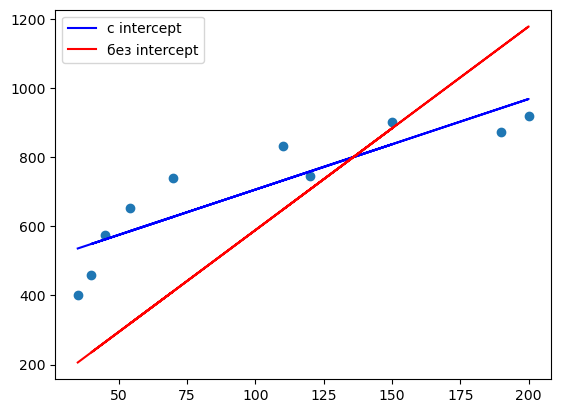

In [235]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred, 'b', label = 'с intercept')
plt.plot(zp, y_pred1, 'r', label = 'без intercept')
plt.legend()
plt.show()

## Задача №2

_Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept)._

Определим значение для вычисленного в Задаче №1 коэффициента **b**.

In [236]:
def mse_(b, x=zp, y=ks):
    return np.sum((b * x - y) ** 2) / len(x)

In [237]:
mse_(b1, zp, ks)

203763.93896082853

In [238]:
# производная функции потерь
def mse_loss(b, x=zp, y=ks):
    return (2 / len(x)) * np.sum((b * x - y) * x)

In [239]:
alpha = 1e-6
b = 0.1
mse_min = mse_(b, zp, ks)
i_min = 1
b_min = b

for i in range(1000):
    b -= alpha * mse_loss(b, zp, ks)
    if i % 100 == 0:
       print(f'Итерация {i}, b: {b}, mse: {mse_(b, zp, ks)}')
    if mse_(b, zp, ks) > mse_min:
        print(f'\nДостигнут минимум'
              f'\nИтерация {i_min}, b: {b_min}, mse: {mse_min},'
              f'\nРезультат: {b_min}')
        break
    else:
        mse_min = mse_(b, zp, ks)
        i_min = i
        b_min = b

Итерация 0, b: 0.25952808000000005, mse: 493237.7212546963
Итерация 100, b: 5.54537842245223, mse: 58151.31823171113
Итерация 200, b: 5.868748638669329, mse: 56522.97550129376
Итерация 300, b: 5.888531320728348, mse: 56516.88130936019
Итерация 400, b: 5.8897415574471985, mse: 56516.85850140053
Итерация 500, b: 5.889815595583751, mse: 56516.858416040064
Итерация 600, b: 5.889820124983314, mse: 56516.85841572062

Достигнут минимум
Итерация 628, b: 5.889820285147628, mse: 56516.85841571966,
Результат: 5.889820285147628


In [240]:
y_pred2 = b * zp
print(f'y_pred2 = {y_pred2}')

y_pred2 = [ 206.14371011  265.041913   1119.06585488 1177.96405777  235.59281155
  412.28742022  318.0502956   883.47304333  706.77843466  647.88023178]


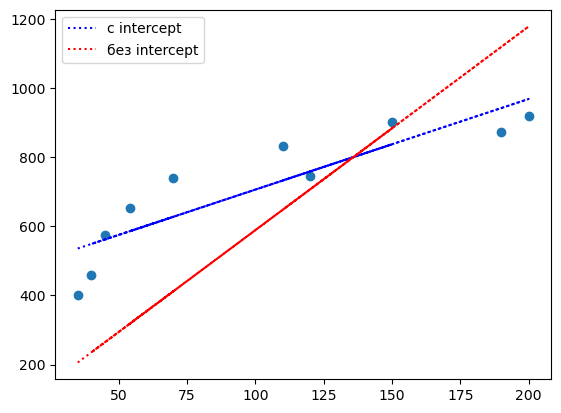

In [241]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred, 'b:', label = 'с intercept')
plt.plot(zp, y_pred2, 'r:', label = 'без intercept')
plt.legend()
plt.show()

## Задача №3

_Произвести вычисления как в пункте 2, но с вычислением intercept.
Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно
(то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации)._

In [242]:
# Функция потерь
def mse_(a, b, x, y):
    return np.sum(((a + b * x) - y) ** 2) / len(x)

In [243]:
# Частная производная функции потерь по a
def mse_loss_a(a, b, x, y):
    return 2 * np.sum((a + b * x) - y) / len(x)

# Частная производная функции потерь по b
def mse_loss_b(a, b, x, y):
    return 2 * np.sum(((a + b * x) - y) * x) / len(x)

In [244]:
alpha = 3e-5
b = 0.1
a = 0.1
mse_ab_min = mse_(a, b, zp, ks)
i_min = 1
b_min = b
a_min = a
iteration = 1000000
for i in range(iteration):
    a -= alpha * mse_loss_a(a, b, zp, ks)
    b -= alpha * mse_loss_b(a, b, zp, ks)
    if i % 50000 == 0:
        print(f'Итерация {i}: a={a}, b={b}, mse={mse_(a, b, zp, ks)}')
    if mse_(a, b, zp, ks) > mse_ab_min:
        print(f'\nДостигнут минимум'
              f'\nИтерация #{i_min}, a: {a_min}, b: {b_min}, mse: {mse_ab_min}.')
        break
    else:
        mse_ab_min = mse_(a, b, zp, ks)
        i_min = i
        b_min = b
        a_min = a
print(f'a: {a_min}\nb: {b_min}')

Итерация 0: a=0.14197959999999998, b=4.884978596113599, mse=70366.2821016992
Итерация 50000: a=236.72655235964433, b=4.147445287981601, mse=17387.09579189967
Итерация 100000: a=347.2559075176058, b=3.3339127474648516, mse=8853.283372220058
Итерация 150000: a=398.89545333636954, b=2.953828643644366, mse=6990.541626266601
Итерация 200000: a=423.0215571081485, b=2.7762525556795365, mse=6583.946467915477
Итерация 250000: a=434.29332323191153, b=2.69328863611563, mse=6495.195773862671
Итерация 300000: a=439.5595159313502, b=2.6545277194387675, mse=6475.823468184463
Итерация 350000: a=442.0198921708081, b=2.6364185381280407, mse=6471.594924044105
Итерация 400000: a=443.16938509390076, b=2.6279578907579992, mse=6470.671926759022
Итерация 450000: a=443.70643059087314, b=2.624005058617609, mse=6470.470456948132
Итерация 500000: a=443.95733936988626, b=2.622158287177236, mse=6470.426480562332
Итерация 550000: a=444.07456447602823, b=2.6212954716991606, mse=6470.41688149387
Итерация 600000: a=444

In [245]:
y_pred3 = a_min + b_min * zp
print(f'y_pred3 = {y_pred3}')

y_pred3 = [535.89541009 562.10087903 942.08017872 968.28564767 548.99814456
 627.61455139 585.68580108 837.25830295 758.64189611 732.43642717]


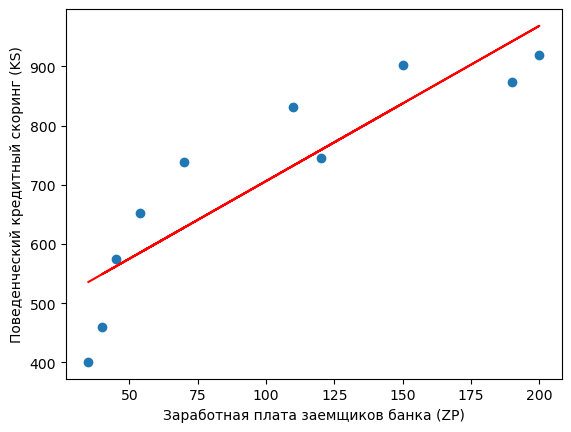

In [246]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred3, 'r')
plt.xlabel('Заработная плата заемщиков банка (ZP)')
plt.ylabel('Поведенческий кредитный скоринг (KS)', rotation=90)
plt.show()